# Detección de lineas

En este notebook veremos como aplicar la transformada de Hough para detectar líneas.

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Leer una imagen de ejemplo

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


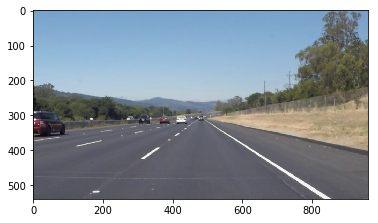

In [2]:

#reading in an image#readin 
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')


## Detección de bordes

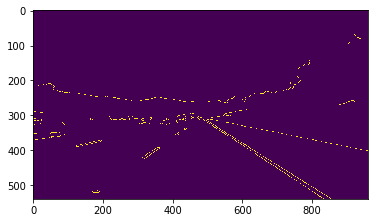

In [3]:
# Convertir a escala de grises
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Filtro Gaussiano
kernel_size = 9;
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Detección de bordes
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Desplegar
plt.imshow(edges)

## Delimiar la región de interés mediante una máscara

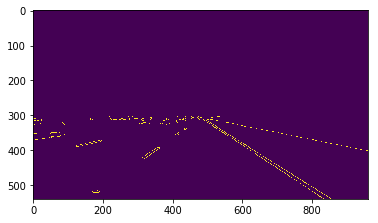

In [4]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(0, imshape[0]*9/16), (imshape[1], imshape[0]*9/16), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
edges = cv2.bitwise_and(edges, mask)

# Desplegar
plt.imshow(edges)

## Aplicar la transformada de Hough

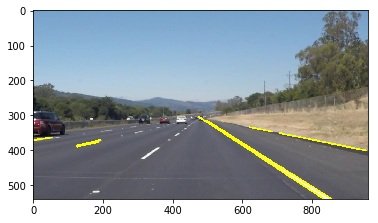

In [7]:

# Define the Hough transform parameters for large lines

# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 70    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
#line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Dibujar las lineas detectadas
image2show = np.copy(image)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image2show,(x1,y1),(x2,y2),(255,255,0),3)        

plt.imshow(image2show)

## Es suficiente?

Si bien se detectaron algunas líneas no todas fueron captadas. ¿De qué forma se puede mejorar la detección?
En el proyecto de esta unidad podrás probar tus ideas.